# Домашнее задание

# 1 - Уменьшение палитры изображения (суммарно 6 баллов)
Для <a href='https://thumbs.dreamstime.com/x/two-lorikeet-birds-2293918.jpg'> картинки </a> нужно уменьшить число цветов в палитре.

Для этого нужно выделить **кластеры в пространстве RGB**, объекты соответствуют пикселям изображения. После выделения кластеров, все пиксели, отнесенные в один кластер, заполняются одним цветом; этот цвет может быть центроидом соответствующего кластера, медианным цветом по кластеру.

Попробуйте различные алгоритмы кластеризации:

* KMeans
* DBSCAN
* AgglomerativeClustering

Рассмотрите число кластеров K = 2, 3, 10, 20 (в алгоритмах, где есть такой гиперпараметр).

Для различных кластеризаций оцените и сравните потери от уменьшения цветов при помощи метрики 
<a href='http://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.compare_ssim'> SSIM </a>. Какой способ оказался лучшим?

Задание оценивает в 5 баллов.

Еще 1 балл даётся за запуск алгоритма на выбранных вами картинках - на них результат должен получиться красивым.

Вот вам вспомогательные функции для считывания и вывода изображений:

In [10]:
import matplotlib.pyplot as plt
import cv2 # нужно поставить себе cv2 через conda install opencv

def draw_picture(image, bgr=False):
    b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.show()

img - это обычный трехмерный массив цветов пикселей, где две первые координаты - это координаты каждого пикселя, и третья обозначает R, G или B.

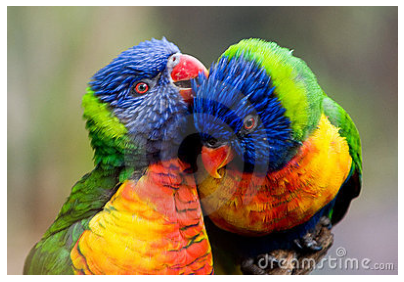

In [11]:
img = cv2.imread('birds.jpg') # считать картинку
draw_picture(img) # нарисовать картинку

In [12]:
print(img.shape) # сам img - это обычный трехмерный массив 275 x 400 x 3
# вам скорее все кстати понадобится сделать reshape, чтобы перейти от 275x400 к одномерному массиву пикселей

(275, 400, 3)


In [28]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
import pandas as pd
import numpy as np
from skimage.metrics import structural_similarity as ssim
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

### Для начала определим функцию, которая будет делать новое изображение с меньшим количеством цветов

In [14]:
def compress_image(model,img,  img_2d=False,  isDBSCAN=False):
  new_pixels = list()
  if not isDBSCAN: 
     for label in model.labels_:
        centroid = [model.cluster_centers_[label]]
        new_pixels.append(centroid)
  else:
    upd_clusters= list()
    for index in range(max(model.labels_) + 1):
      # new clusters
      upd_clusters.append(np.mean(img_2d[model.labels_ == index], axis=0))
    for label in model.labels_:
      # new centroids
      centroid = [upd_clusters[label]]
      new_pixels.append(centroid)  
  return np.array(new_pixels, np.uint8).reshape(img.shape)

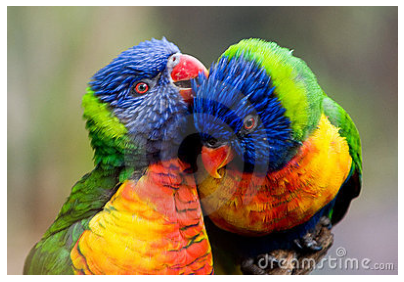

Количество кластеров: 2 , SSIM равен: 0.5334896618028043


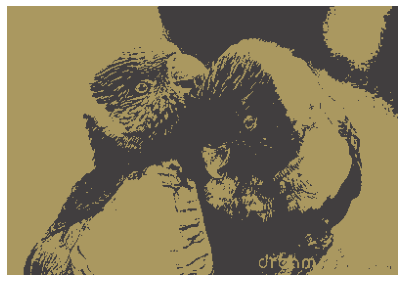

Количество кластеров: 3 , SSIM равен: 0.5633725214047347


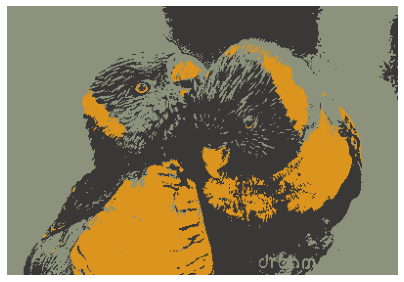

Количество кластеров: 4 , SSIM равен: 0.6252842052167966


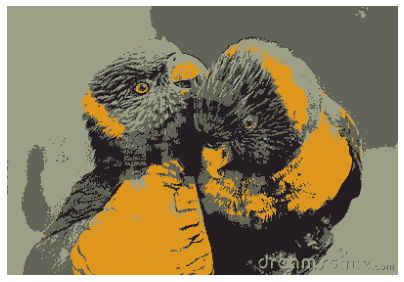

Количество кластеров: 5 , SSIM равен: 0.6248513220173395


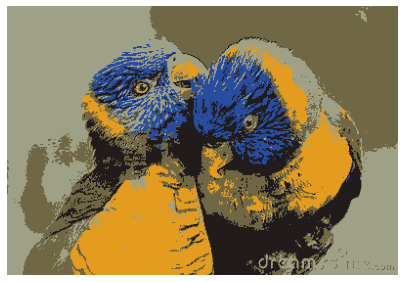

Количество кластеров: 10 , SSIM равен: 0.6788060203148464


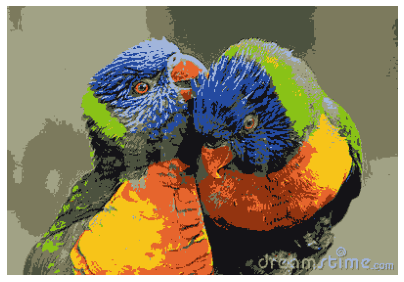

Количество кластеров: 20 , SSIM равен: 0.7561776708856335


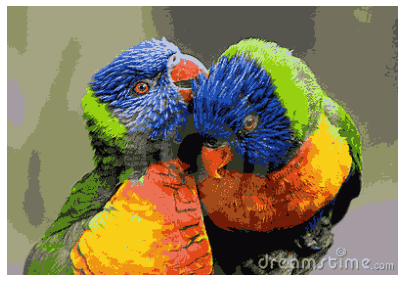

Количество кластеров: 25 , SSIM равен: 0.7735670071261983


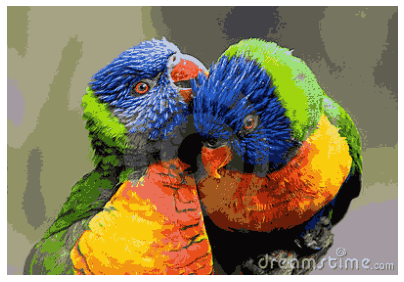

Количество кластеров: 50 , SSIM равен: 0.8322639838864685


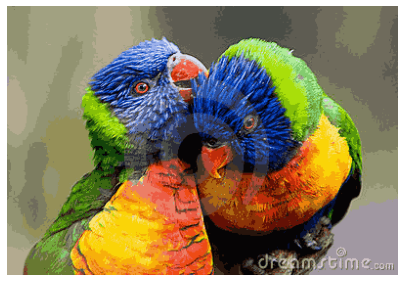

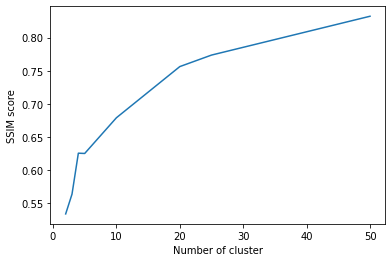

In [26]:
draw_picture(img)
img_2d = img.reshape(img.shape[0] * img.shape[1], img.shape[2]) 
num_of_clusters = [2, 3, 10, 20]
ssim_scores = list()
for parameter in num_of_clusters:
  model = KMeans(parameter)
  model.fit_predict(img_2d)
  compressed_img= compress_image(model=model, img=img)
  ssim_scores.append(ssim(img, compressed_img, multichannel=True))
  print("Количество кластеров: " + str(parameter) + " , SSIM равен: " + str(ssim(img, compressed_img, multichannel=True)))
  draw_picture(compressed_img)
plt.plot(num_of_clusters, ssim_scores)

plt.ylabel('SSIM score')
plt.xlabel('Number of cluster')
plt.show()


### Попробуем DBSCAN

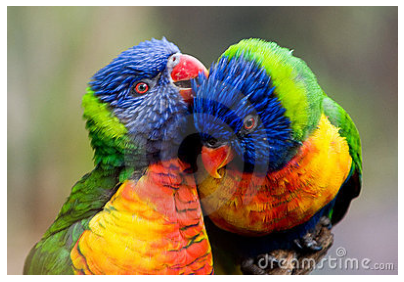

 "Толщина" кисти = 0.5 .Количество соседей для создания кластера: 1 Значение SSIM = 1.0


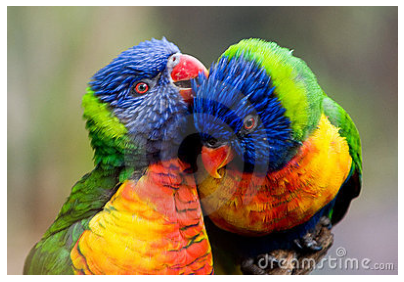

 "Толщина" кисти = 0.5 .Количество соседей для создания кластера: 6 Значение SSIM = 0.25346983107198146


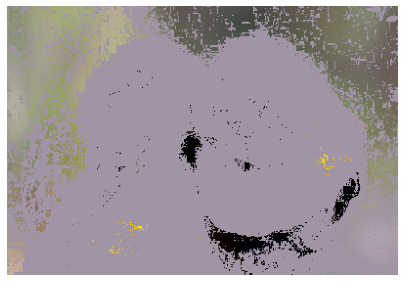

 "Толщина" кисти = 0.5 .Количество соседей для создания кластера: 11 Значение SSIM = 0.2539315337685975


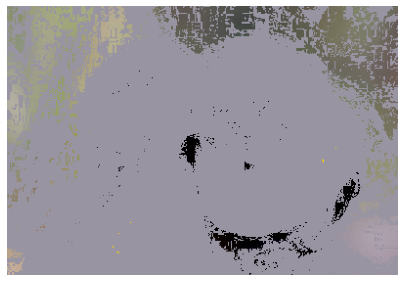

 "Толщина" кисти = 0.5 .Количество соседей для создания кластера: 16 Значение SSIM = 0.2763705760785227


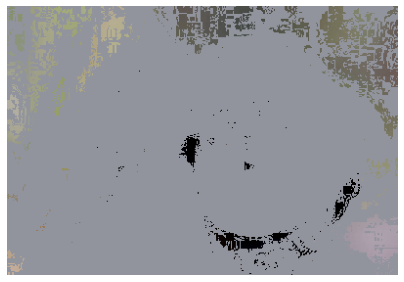

 "Толщина" кисти = 0.5 .Количество соседей для создания кластера: 21 Значение SSIM = 0.2743514476392735


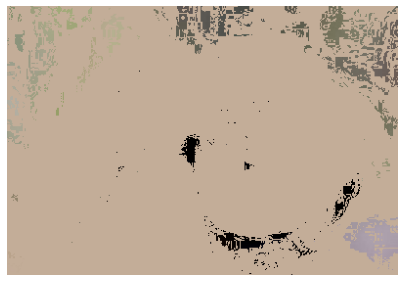

 "Толщина" кисти = 0.5 .Количество соседей для создания кластера: 26 Значение SSIM = 0.3004955056623994


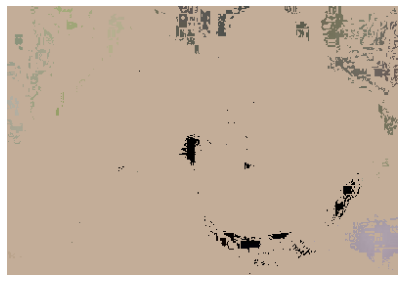

 "Толщина" кисти = 0.5 .Количество соседей для создания кластера: 31 Значение SSIM = 0.33090736527036674


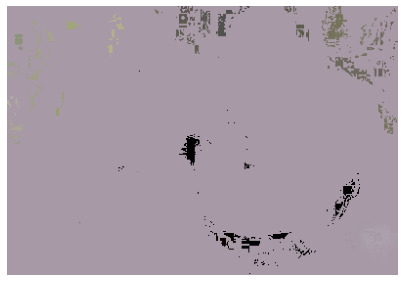

 "Толщина" кисти = 0.5 .Количество соседей для создания кластера: 36 Значение SSIM = 0.3468249177122464


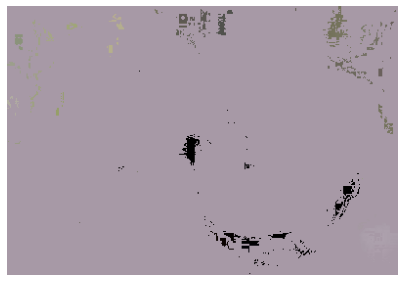

 "Толщина" кисти = 0.5 .Количество соседей для создания кластера: 41 Значение SSIM = 0.35673483940926926


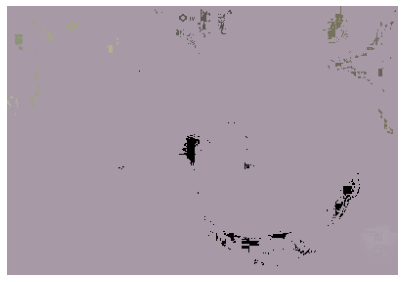

 "Толщина" кисти = 0.5 .Количество соседей для создания кластера: 46 Значение SSIM = 0.3615973204120289


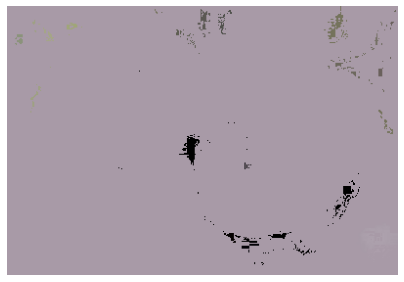

 "Толщина" кисти = 1 .Количество соседей для создания кластера: 1 Значение SSIM = 0.9964867590438389


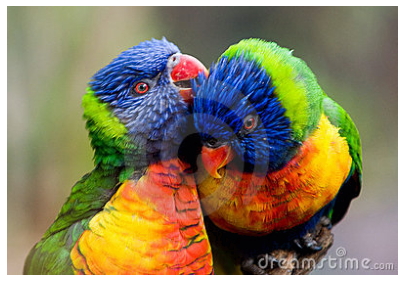

 "Толщина" кисти = 1 .Количество соседей для создания кластера: 6 Значение SSIM = 0.2739207272609523


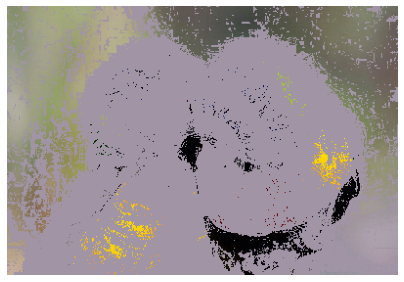

 "Толщина" кисти = 1 .Количество соседей для создания кластера: 11 Значение SSIM = 0.2510939641141849


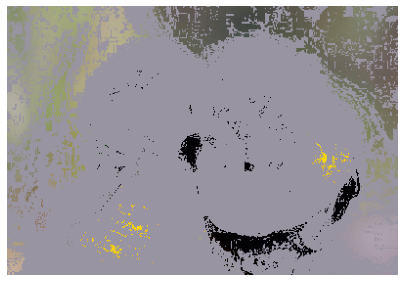

 "Толщина" кисти = 1 .Количество соседей для создания кластера: 16 Значение SSIM = 0.25852415274124163


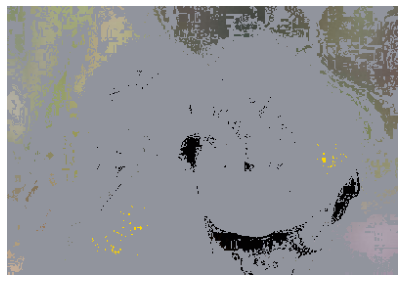

 "Толщина" кисти = 1 .Количество соседей для создания кластера: 21 Значение SSIM = 0.2393480987886107


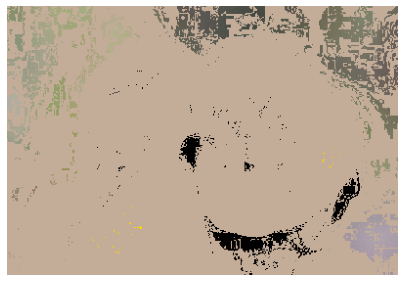

 "Толщина" кисти = 1 .Количество соседей для создания кластера: 26 Значение SSIM = 0.2662661107569195


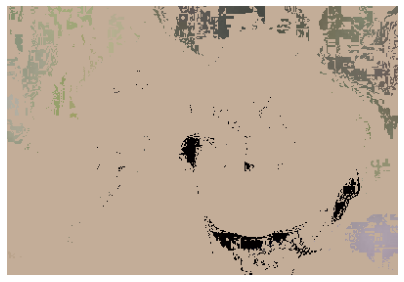

 "Толщина" кисти = 1 .Количество соседей для создания кластера: 31 Значение SSIM = 0.29968647087851735


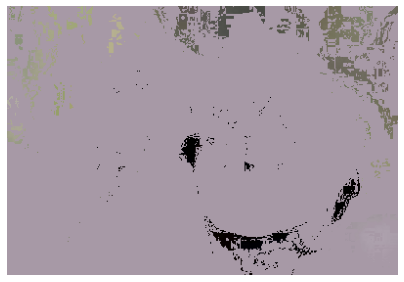

 "Толщина" кисти = 1 .Количество соседей для создания кластера: 36 Значение SSIM = 0.3146092252362413


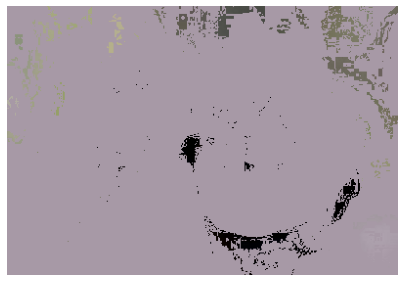

 "Толщина" кисти = 1 .Количество соседей для создания кластера: 41 Значение SSIM = 0.33049119081059763


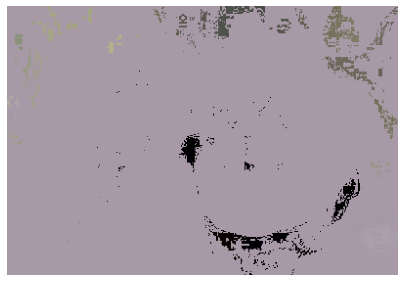

 "Толщина" кисти = 1 .Количество соседей для создания кластера: 46 Значение SSIM = 0.3383973659312409


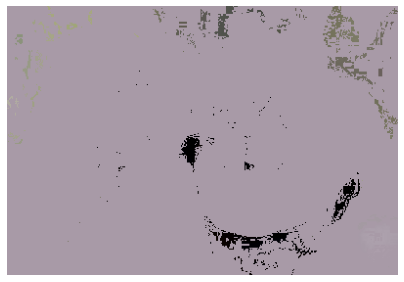

 "Толщина" кисти = 5 .Количество соседей для создания кластера: 1 Значение SSIM = 0.46944158343673575


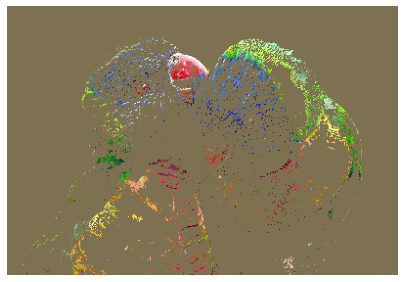

 "Толщина" кисти = 5 .Количество соседей для создания кластера: 6 Значение SSIM = 0.39804689294653084


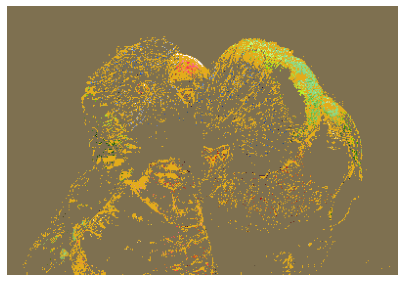

 "Толщина" кисти = 5 .Количество соседей для создания кластера: 11 Значение SSIM = 0.385954422673852


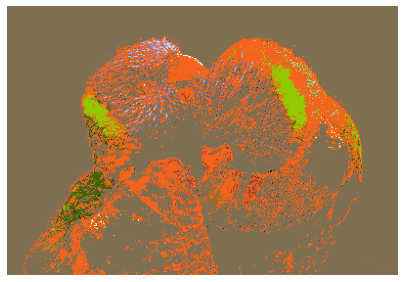

 "Толщина" кисти = 5 .Количество соседей для создания кластера: 16 Значение SSIM = 0.4394394241980533


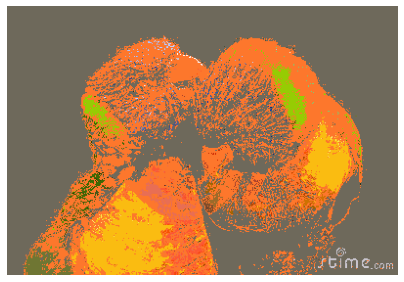

 "Толщина" кисти = 5 .Количество соседей для создания кластера: 21 Значение SSIM = 0.34707723880450053


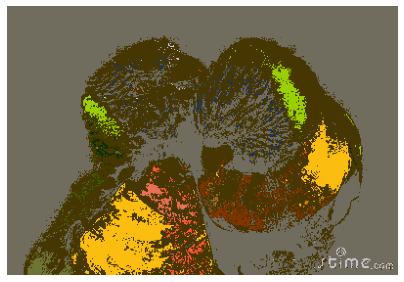

 "Толщина" кисти = 5 .Количество соседей для создания кластера: 26 Значение SSIM = 0.3726654154222919


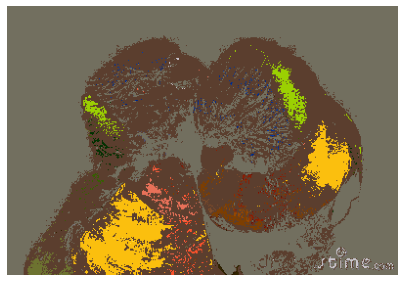

 "Толщина" кисти = 5 .Количество соседей для создания кластера: 31 Значение SSIM = 0.3352355378297891


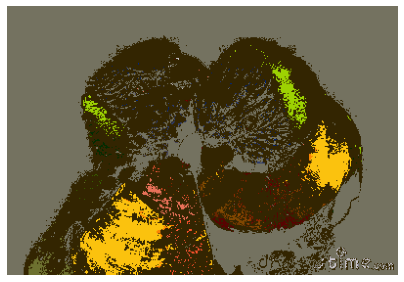

 "Толщина" кисти = 5 .Количество соседей для создания кластера: 36 Значение SSIM = 0.4160246484522599


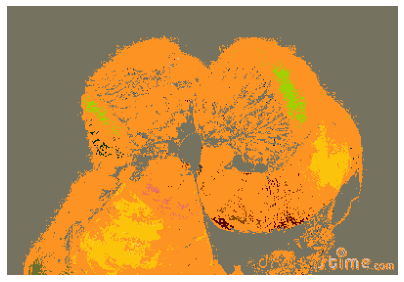

 "Толщина" кисти = 5 .Количество соседей для создания кластера: 41 Значение SSIM = 0.47822474599158044


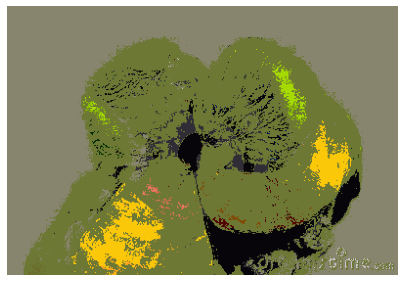

 "Толщина" кисти = 5 .Количество соседей для создания кластера: 46 Значение SSIM = 0.46840184543219016


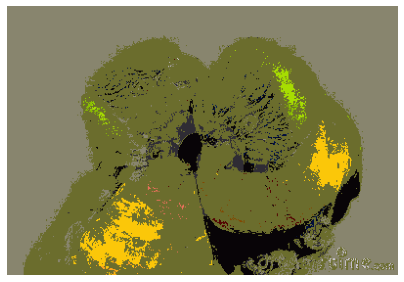

 "Толщина" кисти = 10 .Количество соседей для создания кластера: 1 Значение SSIM = 0.41285820201688717


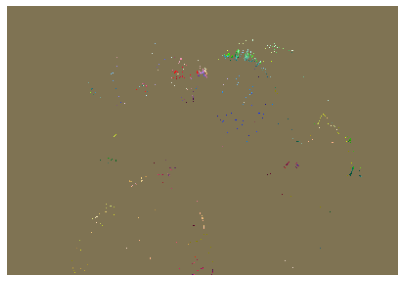

 "Толщина" кисти = 10 .Количество соседей для создания кластера: 6 Значение SSIM = 0.40097521016903387


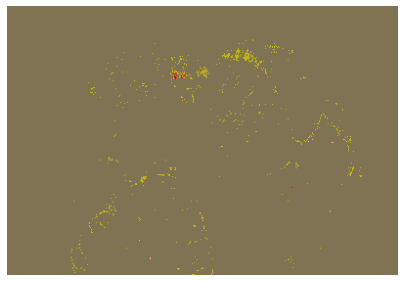

 "Толщина" кисти = 10 .Количество соседей для создания кластера: 11 Значение SSIM = 0.40934608685929225


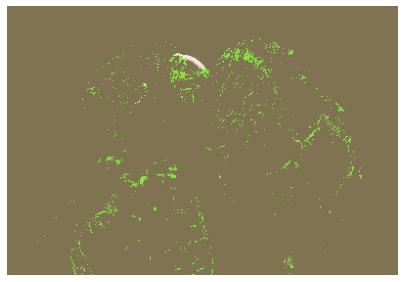

 "Толщина" кисти = 10 .Количество соседей для создания кластера: 16 Значение SSIM = 0.41199646286859354


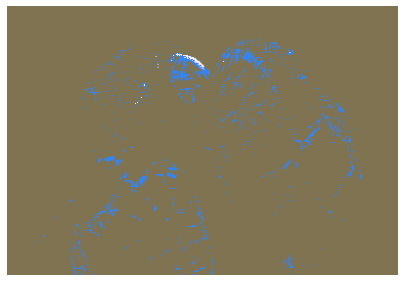

 "Толщина" кисти = 10 .Количество соседей для создания кластера: 21 Значение SSIM = 0.42070710748214823


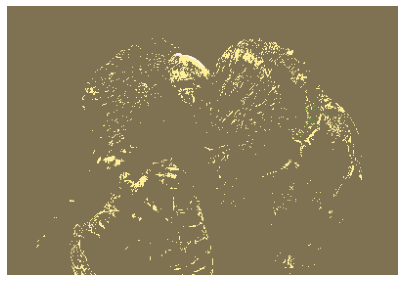

 "Толщина" кисти = 10 .Количество соседей для создания кластера: 26 Значение SSIM = 0.42126460703697344


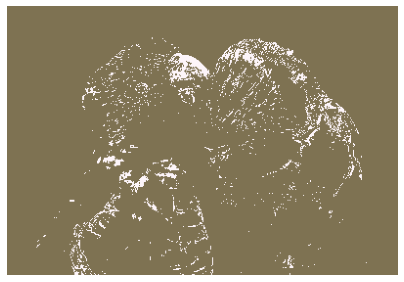

 "Толщина" кисти = 10 .Количество соседей для создания кластера: 31 Значение SSIM = 0.42474286509413134


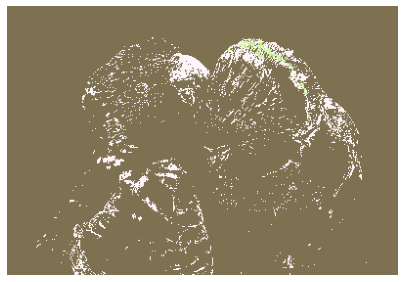

 "Толщина" кисти = 10 .Количество соседей для создания кластера: 36 Значение SSIM = 0.4296276999920499


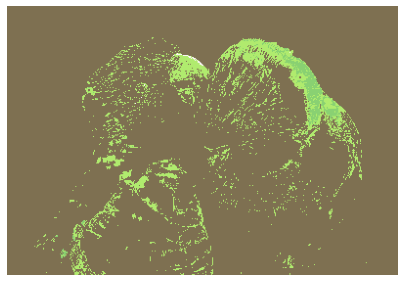

 "Толщина" кисти = 10 .Количество соседей для создания кластера: 41 Значение SSIM = 0.40433749654890244


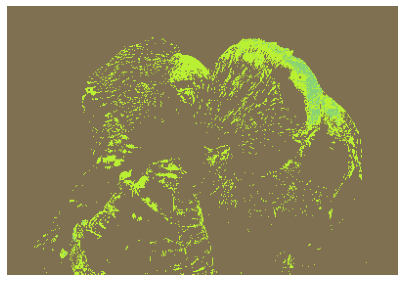

 "Толщина" кисти = 10 .Количество соседей для создания кластера: 46 Значение SSIM = 0.4430254777202279


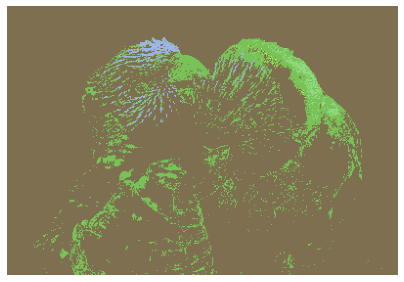

In [30]:
draw_picture(img)
img_2dim = img.reshape(img.shape[0]*img.shape[1], img.shape[2])

ssim_score = list()
num_samples = range(1,51,5)
epsilon = [.5, 1,  5 ,10]
for eps in epsilon:
  for num in num_samples:
    model = DBSCAN(eps=eps, min_samples=num)
    model.fit_predict(img_2d)
    compressed_img= compress_image(model = model, isDBSCAN=True,img=img, img_2d=img_2dim)
    ssim_score.append(ssim(img, compressed_img, multichannel=True))
    print(" \"Толщина\" кисти = " + str(eps) + " .Количество соседей для создания кластера: " + str(num)+ " Значение SSIM = " + str(ssim(img, compressed_img, multichannel=True)))
    draw_picture(compressed_img)

### Результат скверный, KMeans выглядит лучше.

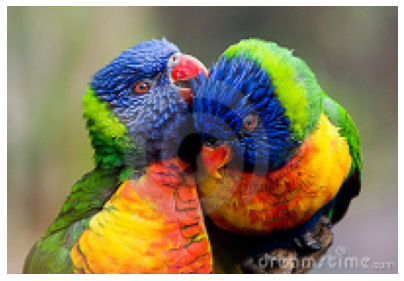

In [4]:
thumbnail = cv2.resize(img , dsize = (img.shape[1] // 2, img.shape[0]//2)) #иначе крашится изза заполнения оперативной памяти
draw_picture(thumbnail)

Метрика для измерения linkage ward. Количество кластеров: 2SSIM = 0.47359151289081164


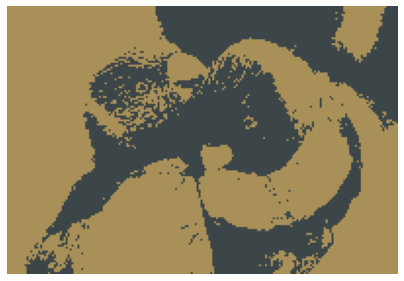

Метрика для измерения linkage average. Количество кластеров: 2SSIM = 0.4656759946621851


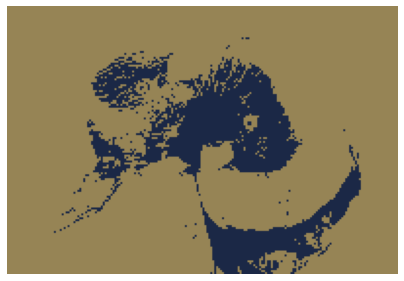

Метрика для измерения linkage single. Количество кластеров: 2SSIM = 0.33849383665251676


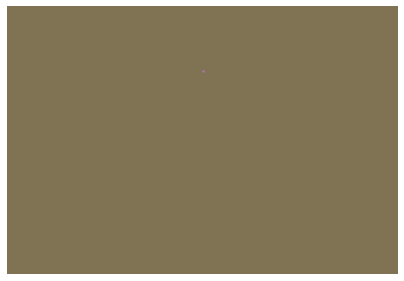

Метрика для измерения linkage complete. Количество кластеров: 2SSIM = 0.43402956120488795


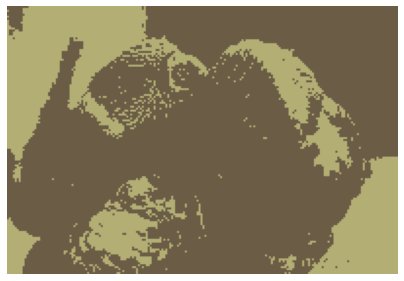

Метрика для измерения linkage ward. Количество кластеров: 3SSIM = 0.502892938482595


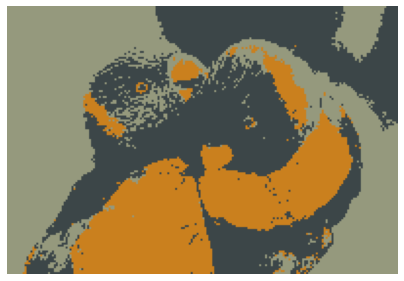

Метрика для измерения linkage average. Количество кластеров: 3SSIM = 0.5192497231018794


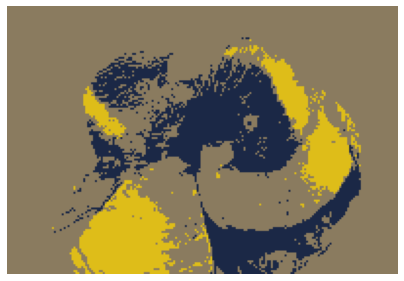

Метрика для измерения linkage single. Количество кластеров: 3SSIM = 0.33851779821297806


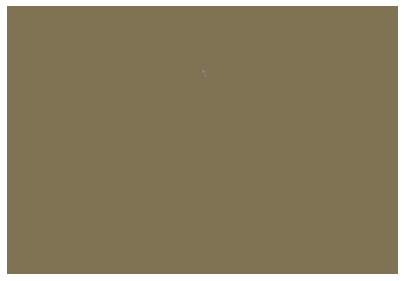

Метрика для измерения linkage complete. Количество кластеров: 3SSIM = 0.5117159191863236


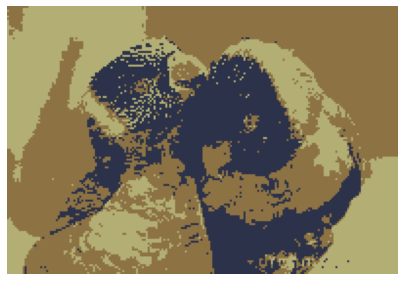

Метрика для измерения linkage ward. Количество кластеров: 10SSIM = 0.6453090369473685


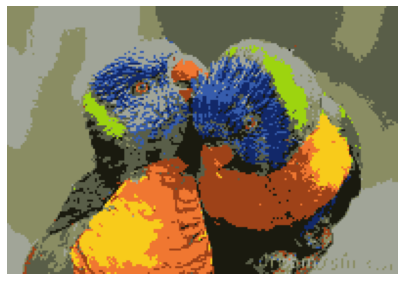

Метрика для измерения linkage average. Количество кластеров: 10SSIM = 0.6356798749035241


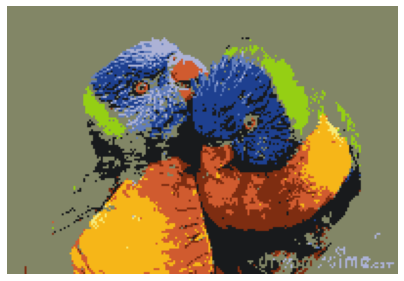

Метрика для измерения linkage single. Количество кластеров: 10SSIM = 0.33869031801399774


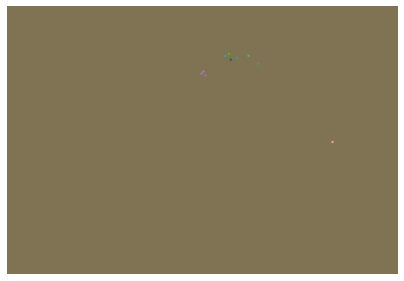

Метрика для измерения linkage complete. Количество кластеров: 10SSIM = 0.6491825330467118


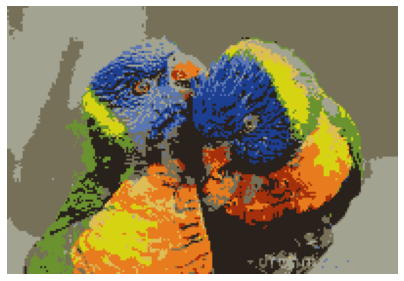

Метрика для измерения linkage ward. Количество кластеров: 20SSIM = 0.7383110442924234


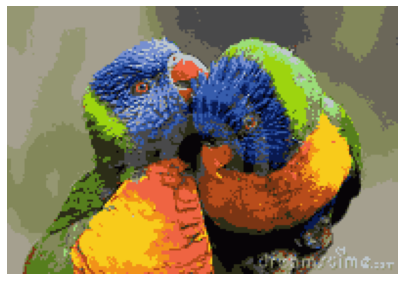

Метрика для измерения linkage average. Количество кластеров: 20SSIM = 0.7157367309672846


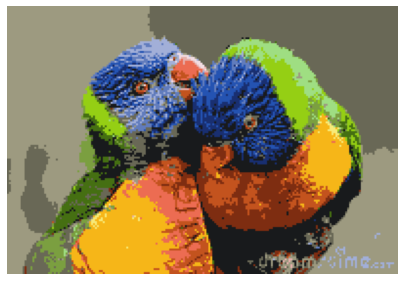

Метрика для измерения linkage single. Количество кластеров: 20SSIM = 0.3396004322099995


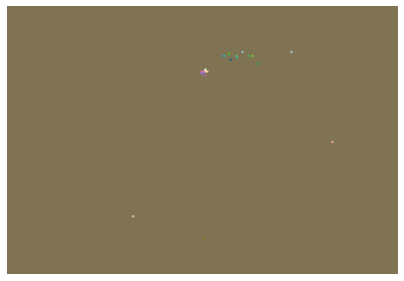

Метрика для измерения linkage complete. Количество кластеров: 20SSIM = 0.7080655681404848


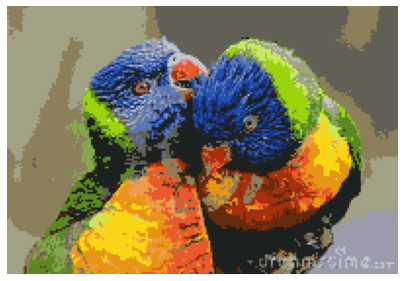

In [18]:
img_2dim = thumbnail.reshape(thumbnail.shape[0]*thumbnail.shape[1], thumbnail.shape[2])
num_clusters = [2, 3, 10, 20]
samples = ['ward', 'average', 'single', 'complete'] 
ssim_scores = []
for num in num_clusters:
  for method in samples:
     model = AgglomerativeClustering(n_clusters=num, linkage=method)
     model.fit_predict(img_2dim)
     compressed_img = compress_image(model=model, isDBSCAN=True, img_2d=img_2dim, img=thumbnail)
     ssim_scores.append(ssim(thumbnail, compressed_img, multichannel=True))
     print("Метрика для измерения linkage " + str(method) + ". Количество кластеров: " + str(num) + ". SSIM = " + str(ssim(thumbnail, compressed_img, multichannel=True)))
     draw_picture(compressed_img)

# 2 - Уменьшение размерности помогает классификации лиц (суммарно 6 баллов)

Используя методы уменьшения размерности признаков, решите с максимальным **accuracy** задачу классификации лиц знаменитостей (датасет старый, неудивительно, если вы из всех знаменитостей будете знать только Буша и Шварценнегера).

Попробуйте добиться максимального accuracy (2 балла)
* без уменьшения размерности
* с уменьшением размерности

Возможно без уменьшения размерности у вас даже просто не получится дождаться времени работы на 11750 признаках. Я слышал у кого-то получилось, у меня нет.

Сравните ваш результат с константным предсказанием "всегда самый популярный класс". Делает ли ваша модель какой-то значительный прогресс? (1 балл)

Нарисуйте несколько лиц, на которых ваш алгоритм ошибся, подпишите правильный ответ и ваш ответ. (1 балл)

Напишите, каким алгоритмом вы воспользовались (PCA или TSNE), почему не другим? Обоснуйте ответ. (1 балл)

Визуализируйте датасет на плоскости. Подпишите несколько самых больших классов именами людей. Чем вы воспользуетесь, PCA или TSNE? Обоснуйте ответ (1 балл)

Скачивание данных и вспомогательная функция визуализации лиц уже есть:

In [88]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=30, resize=1.0)
# эту строчку менять нельзя, ресайзить нельзя

In [89]:
from sklearn.model_selection import train_test_split
X = lfw_people.data
y = lfw_people.target
names = lfw_people.target_names

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=42)
# эту строчку тоже менять нельзя'

In [91]:
X.shape # 2370 лиц, каждый из них представляется вектором размера 11750

(2370, 11750)

In [92]:
y.shape

(2370,)

In [93]:
names[8] # в y лежат номера, а names переводит номер в имя

'George W Bush'

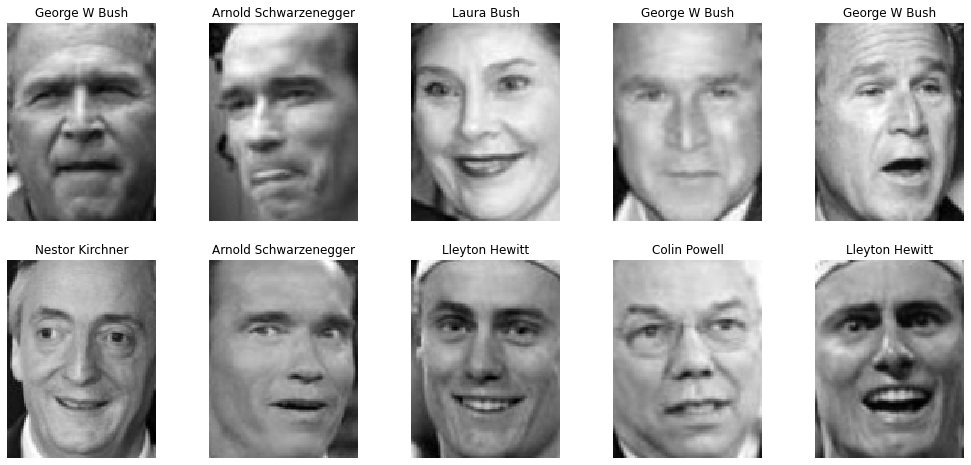

In [94]:
import matplotlib.pyplot as plt
def plot_image(image_id):
    # функция рисует изображение номер image_id
    plt.title(names[y[image_id]])
    plt.imshow(255 - lfw_people['images'][image_id], cmap=plt.cm.gray_r, interpolation='nearest')
    
def plot_grid(image_ids, nrows, ncols):
    # функция рисует изображения с id равными image_ids
    # в nrows рядов и ncols столбцов
    fig = plt.gcf()
    fig.set_size_inches(17.5, 8)
    for index, example_id in enumerate(image_ids):
        plt.subplot(nrows, ncols, index + 1)
        plot_image(example_id)
        plt.axis('off')

plot_grid(range(10), nrows=2, ncols=5)# первые 10 лиц

### Создадим константную модель.

In [29]:
freq = pd.Series(y).value_counts()
print("Printing the frequency")
display(freq)

Printing the frequency


8     530
5     236
31    144
7     121
9     109
3      77
13     71
19     60
15     55
17     53
28     52
14     52
33     49
23     48
10     44
4      42
16     42
22     41
21     41
0      39
12     39
25     37
2      36
1      35
24     33
30     33
29     33
20     32
27     32
32     32
18     31
6      31
26     30
11     30
dtype: int64

In [33]:
const_model = (np.ones(y_test.shape[0]) * 8).astype(int)
const_model

array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,

In [34]:
logistic_regression = linear_model.LogisticRegression(fit_intercept=True).fit(X_train, y_train)
forest_classifier = RandomForestClassifier().fit(X_train, y_train)


In [36]:
from sklearn.metrics import accuracy_score
print("Accuracy логистической регрессии \n", accuracy_score(y_test, logistic_regression.predict(X_test)))
print("Accuracy случайного леса \n", accuracy_score(y_test, forest_classifier.predict(X_test)))
print("Accuracy константной модели \n", accuracy_score(y_test, const_model))

Accuracy логистической регрессии 
 0.6729957805907173
Accuracy случайного леса 
 0.46835443037974683
Accuracy константной модели 
 0.23839662447257384


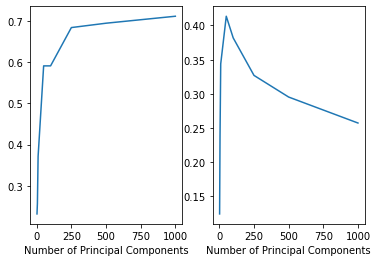

In [43]:
accuracy_scr_logreg = list()
accuracy_scr_rndforest=list()
principal_components = [2, 5, 10, 50, 100, 250, 500, 1000]
for pc in principal_components:
  decomposer = PCA(n_components = pc)
  X_train_compressed = decomposer.fit_transform(X_train)
  X_test_compressed = decomposer.transform(X_test)

  logistic_reg = linear_model.LogisticRegression(fit_intercept=True).fit(X_train_compressed, y_train)
  forest_classifier = RandomForestClassifier().fit(X_train_compressed, y_train)
  accuracy_scr_logreg.append(accuracy_score(y_test,logistic_reg.predict(X_test_compressed)))
  accuracy_scr_rndforest.append(accuracy_score(y_test,forest_classifier.predict(X_test_compressed)))

plt.subplot(1, 2, 1)
plt.plot(principal_components, accuracy_scr_logreg)
plt.xlabel('Number of Principal Components')
plt.subplot(1, 2, 2)
plt.plot(principal_components, accuracy_scr_rndforest)
plt.xlabel('Number of Principal Components')
plt.show()

In [44]:
max(accuracy_scr_logreg)

0.7109704641350211

Неплохой результат! Далее будем работать с логистической регрессией. Давайте попробуе TSNE сжатие

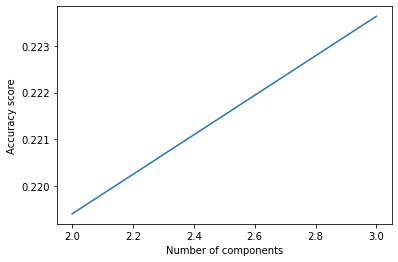

In [47]:
accuracy_logreg = list()
dimensions_of_embedded_space = [2,3]
for component in dimensions_of_embedded_space:
  model = TSNE(n_components=component, n_iter=350)
  X_for_tsne = model.fit_transform(X)

  X_train_tsne, X_test_tsne, y_train, y_test = train_test_split(X_for_tsne, y, train_size=0.8)
  logistic_reg = linear_model.LogisticRegression(fit_intercept=True).fit(X_train_tsne, y_train)
  prediction = logistic_reg.predict(X_test_tsne)
  accuracy_logreg.append(accuracy_score(y_test, prediction))
plt.plot(dimensions_of_embedded_space, accuracy_logreg)
plt.xlabel('Number of components')
plt.ylabel('Accuracy score')
plt.show()


In [48]:
max(accuracy_logreg)

0.22362869198312235

In [111]:
decomposer = PCA(n_components = 1000)
X_train_compressed = decomposer.fit_transform(X_train)
X_test_compressed = decomposer.transform(X_test)

logistic_reg = linear_model.LogisticRegression(fit_intercept=True).fit(X_train_compressed, y_train)
predictions = logistic_reg.predict(X_test_compressed)

## Позор.

In [95]:
def print_image(img_id):
    fig = plt.gcf()
    plt.title("name: " + names[y_test[img_id]] + "\n" + "predicted: " + names[predictions[img_id]])
    plt.imshow(X_test[img_id].reshape(lfw_people.images.shape[1:]), cmap=plt.cm.gray, interpolation='nearest')
    plt.axis('off')

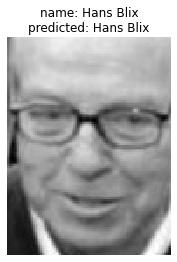

In [113]:
print_image(18)

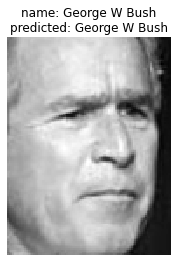

In [114]:
print_image(14)

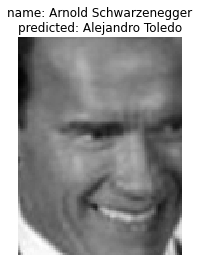

In [115]:
print_image(19)

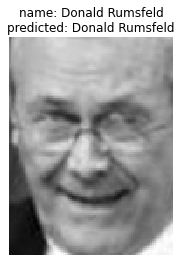

In [116]:
print_image(20)

In [112]:
print(accuracy_score(y_test, predictions))

0.7109704641350211


### Модель работает относительно хорошо.

## Так как TSNE — инструмент для визуализации многомерных данных, то для визуализации датасета воспользуемся им.

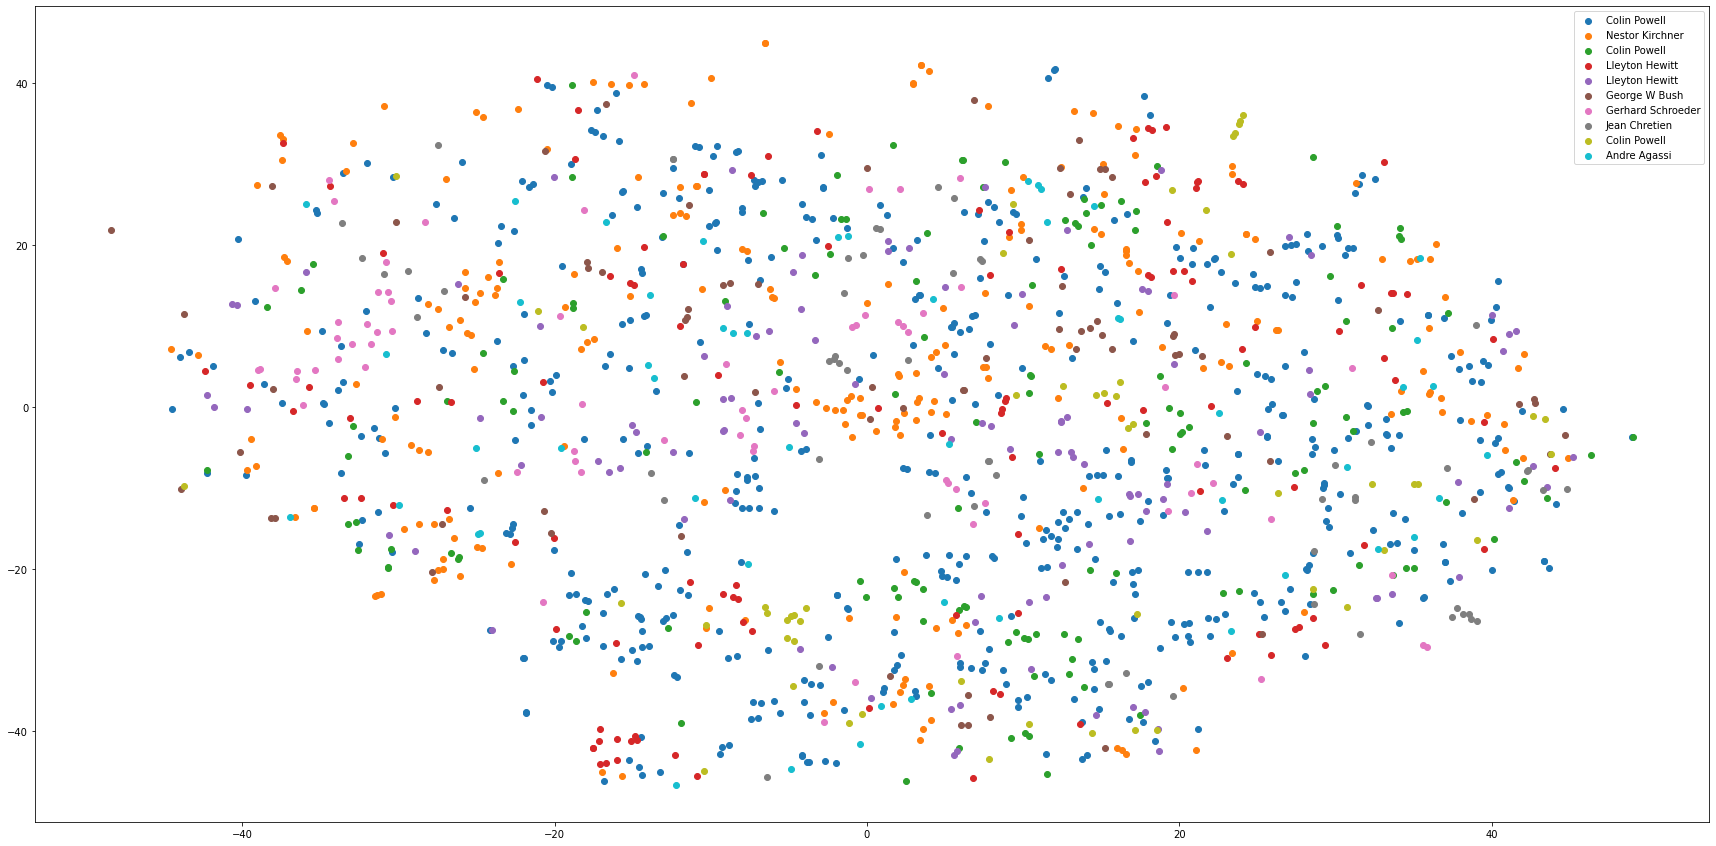

In [124]:
from matplotlib.colors import Normalize
visualizer = TSNE(n_components = 2)
X_for_tsne = visualizer.fit_transform(X)

plt.figure(figsize=(30,15))
for name in pd.Series(y).value_counts().index[:10]:
  normalizer = Normalize(vmin=0, vmax=10)
  color = plt.cm.gist_ncar(normalizer(name))
  plt.scatter(X_for_tsne[:, 0][y==name],
              X_for_tsne[:,1][y==name], label=names[y[name]])
plt.legend()

## Cringe? I'd say definitely cringe. Никакой информации такая визуализация в себе не несёт.